In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('./미니프로젝트-쇼핑몰 실습데이터.xlsx')

In [5]:
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN


In [9]:
charge = []

for o in df['주문번호'].unique():
    m = df['주문번호'] == o
    df_mask = df[m]
    
    charge.append([o, df_mask['판매금액'].sum()])

In [13]:
charge_res = pd.DataFrame(charge, columns=['주문번호','판매금액총계'])

In [15]:
charge_res.sort_values('판매금액총계', ascending=False)

,주문번호,판매금액총계
61755,211123163230446,19800000
22495,210207222549511,11130000
43106,210714183022909,9600000
42850,210713083310134,9600000
22505,210208073113749,9275000
...,...,...
6516,200624145106358,0
88,191223170919449,0
7411,200720110402271,0
27757,210319090937572,0


In [16]:
import seaborn as sns

In [21]:
df['월'] = df['주문일자'].apply(lambda x: str(x).split('-')[1])

In [23]:
df['월'].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

Text(0.5, 1.0, 'charge per month')

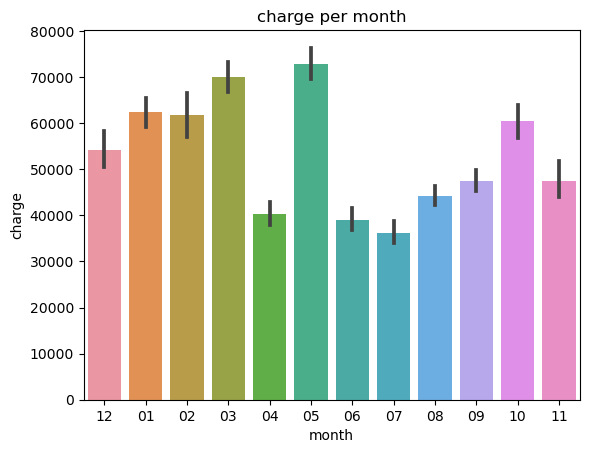

In [29]:
sns.barplot(data=df, x='월', y='판매금액')
plt.xlabel('month')
plt.ylabel('charge')
plt.title('charge per month')

In [30]:
df.head()

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,월
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,12


In [31]:
df['할부기간'].unique()

array([nan, '12개월', '1개월', '24개월', '6개월', '18개월'], dtype=object)

### 할부기간을 고려하는 법 (1월 12만원 결제분 기준)
1. nan 값을 일시불 (=1개월)로 처리한다
1. 6개월은 1~6월에 나눠 더한다 (6등분)
1. 12개월은 각 월별로 나눠 더한다 (12등분)
1. 24개월은 12월과 같이 처리한다 (연도를 무시하기 때문)
1. 18개월은 각 월별로 나눠 더한 뒤, 1~6월에 나눠 한번 더 더한다 (18등분)

In [39]:
def processing(x):
    if x != x or x == '1개월':
        return 1
    elif x == '24개월':
        return 12
    elif x == '6개월':
        return 6
    else:
        return int(x[:2])
        

df['할부기간'] = df['할부기간'].apply(lambda x: processing(x))

In [84]:
charge_by_month = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in df.index:
    charge = df.loc[i,'판매금액']
    month = int(df.loc[i,'월'])
    dividing = df.loc[i,'할부기간']
    
    charge_by_month[month-1] = charge
    
    if dividing == 12:
        charge_by_month = [c+(charge/12) for c in charge_by_month]
        
    elif dividing == 6:
        if month < 8:
            for j in range(6):
                charge_by_month[month-1+j] += charge/6
                
        else:
            for j in range(6):
                if month < 8:
                    charge_by_month[month-1+j] += charge/6
                else:
                    charge_by_month[month-13+j] += charge/6
                    
    elif dividing == 18:
        charge_by_month = [c+(charge/18) for c in charge_by_month]
        
        if month < 8:
            for j in range(6):
                charge_by_month[month-1+j] += charge/18
                
        else:
            for j in range(6):
                if month < 8:
                    charge_by_month[month-1+j] += charge/18
                else:
                    charge_by_month[month-13+j] += charge/18
                    
    else:
        charge_by_month[month-1] += charge

In [85]:
charge_by_month = pd.DataFrame(charge_by_month)
charge_by_month['1'] = [1,2,3,4,5,6,7,8,9,10,11,12]

In [86]:
charge_by_month

,0,1
0,25877400.0,1
1,21700800.0,2
2,16031000.0,3
3,12170000.0,4
4,8107000.0,5
5,6859800.0,6
6,5246000.0,7
7,3541600.0,8
8,1359200.0,9
9,410400.0,10


Text(0.5, 1.0, 'charge per month')

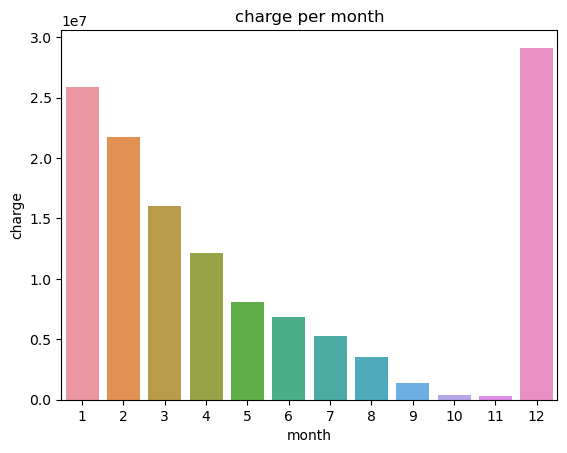

In [87]:
sns.barplot(data=charge_by_month, x='1', y=0)
plt.xlabel('month')
plt.ylabel('charge')
plt.title('charge per month')

In [89]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [91]:
df['결제방법'] = df['결제방법'].fillna('-')

In [93]:
df['결제방법_정리'] = df['결제방법'].apply(lambda x: x[0])

In [96]:
import math

In [99]:
df['판매금액_로그'] = df['판매금액'].apply(lambda x: math.log2(x+0.001))

In [103]:
from statannot import add_stat_annotation

Text(0, 0.5, 'charge')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\

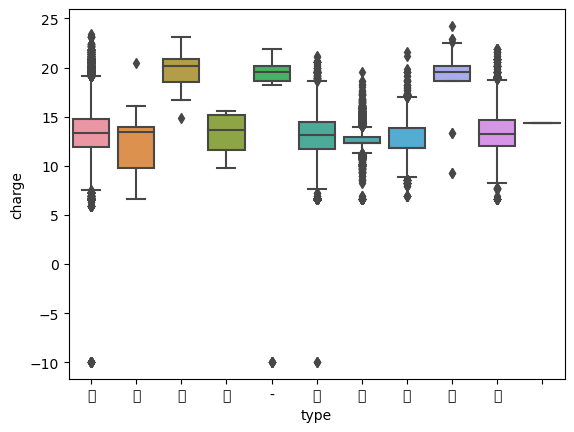

In [101]:
sns.boxplot(data=df, x='결제방법_정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')

In [ ]:
ax = plt.subplot()
sns.boxplot(data=df, x='결제방법_정리', y='판매금액_로그')

add_stat_annotation(ax,
                    data=df, 
                    x = '결제방법_정리', 
                    y = '판매금액',
                    box_pairs=[(('1009'), ('1040'))],
                    test='t-test_welch', 
                    text_format='star', 
                    loc='inside', 
                    verbose=2)

In [104]:
df['결제방법_정리'].unique()

array(['신', '가', '후', '무', '-', '포', '적', '웰', '정', '현', ' '],
      dtype=object)

In [114]:
def type_processing(x):
    if x == '신':
        return 'Card'
    if x == '가':
        return 'Virtual Account'
    if x == '후':
        return 'Deferred Payment'
    if x == '무':
        return 'Account'
    if x == '-' or x == ' ':
        return 'Etc.'
    if x == '포' or x == '적' or x == '웰':
        return 'Point'
    if x == '정':
        return 'Regular Payment'
    if x == '현':
        return 'Cash'

In [118]:
df['결제방법_정리'] = df['결제방법_정리'].apply(lambda x: type_processing(x))

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Card'),
  Text(1, 0, 'Virtual Account'),
  Text(2, 0, 'Deferred Payment'),
  Text(3, 0, 'Account'),
  Text(4, 0, 'Etc.'),
  Text(5, 0, 'Point'),
  Text(6, 0, 'Regular Payment'),
  Text(7, 0, 'Cash')])

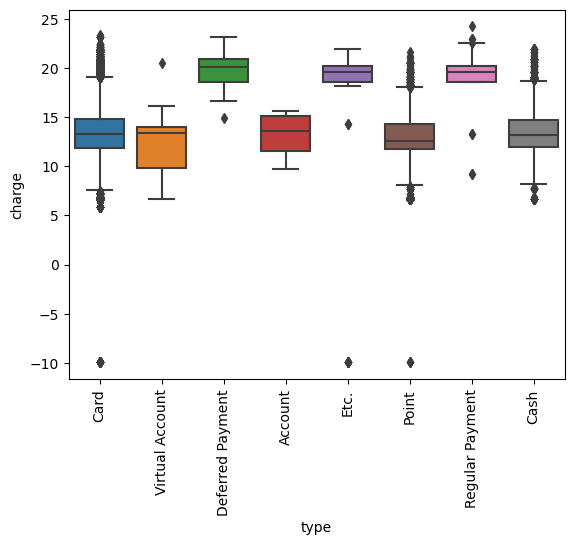

In [126]:
sns.boxplot(data=df, x='결제방법_정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Card v.s. Virtual Account: t-test independent samples with Bonferroni correction, P_val=9.491e-02 stat=2.262e+00
Card v.s. Deferred Payment: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.286e+01
Card v.s. Account: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.609e-01
Card v.s. Etc.: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-9.396e+01


(<AxesSubplot:xlabel='type', ylabel='charge'>,
  <statannot.StatResult.StatResult at 0x24d43802e50>])

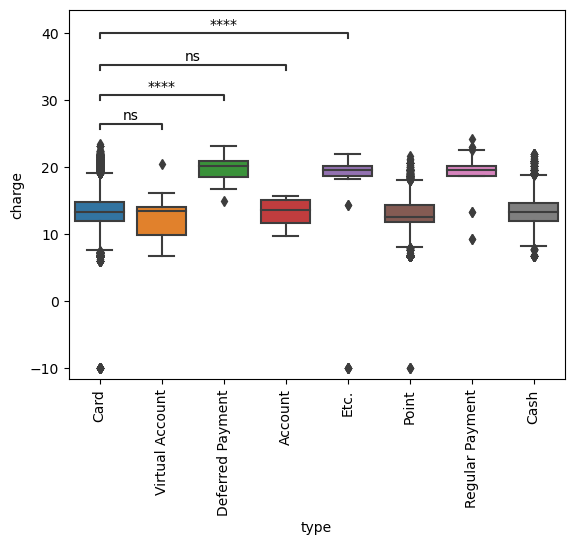

In [140]:
ax = plt.subplot()
ax = sns.boxplot(data=df, x='결제방법_정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

add_stat_annotation(ax, 
                    data=df, 
                    x = '결제방법_정리', 
                    y = '판매금액_로그',
                    box_pairs=[(('Card'), ('Virtual Account')),
                              (('Card'), ('Deferred Payment')),
                              (('Card'), ('Account')),
                              (('Card'), ('Etc.'))],
                    test='t-test_ind', 
                    text_format='star', 
                    loc='inside', 
                    verbose=2)

In [133]:
from scipy import stats

In [134]:
stats.shapiro(df['판매금액'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.20134729146957397, pvalue=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='판매금액', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


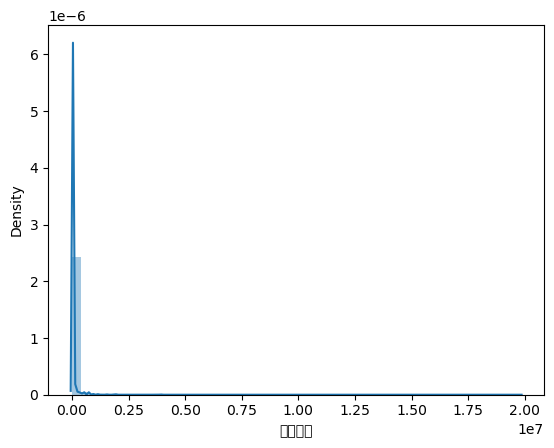

In [135]:
sns.distplot(df['판매금액'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='판매금액_로그', ylabel='Density'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\

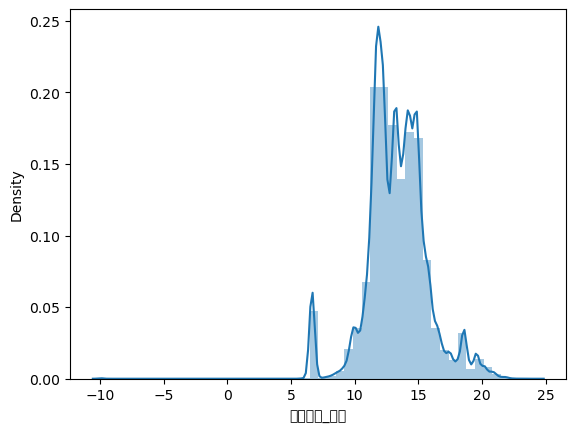

In [136]:
sns.distplot(df['판매금액_로그'])

In [137]:
stats.shapiro(df['판매금액_로그'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9571788907051086, pvalue=0.0)

((array([-4.51466627, -4.32298362, -4.21896726, ...,  4.21896726,
          4.32298362,  4.51466627]),
  array([       0,        0,        0, ...,  9600000, 11130000, 19800000],
        dtype=int64)),
 (99213.45347820267, 52759.01132657216, 0.44858449833266983))

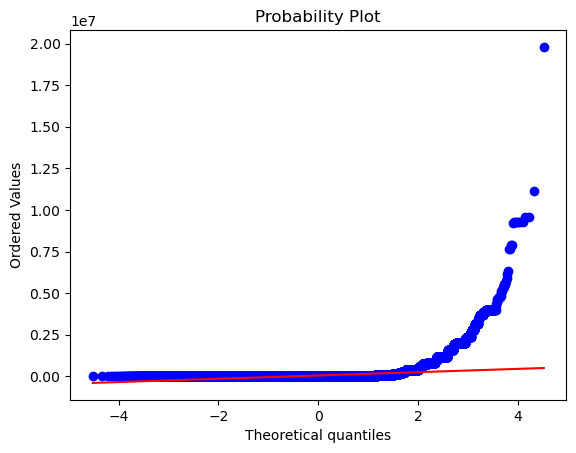

In [138]:
stats.probplot(df['판매금액'], plot=plt)

((array([-4.51466627, -4.32298362, -4.21896726, ...,  4.21896726,
          4.32298362,  4.51466627]),
  array([-9.96578428, -9.96578428, -9.96578428, ..., 23.19460298,
         23.40795026, 24.23899709])),
 (2.369647680779799, 13.319049561532854, 0.9784806303690355))

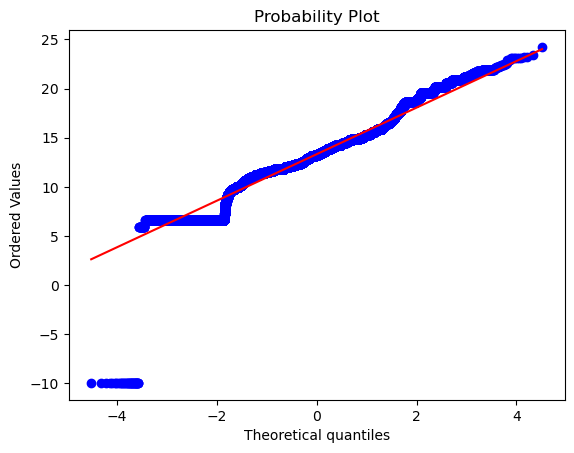

In [139]:
stats.probplot(df['판매금액_로그'], plot=plt)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Card v.s. Virtual Account: t-test independent samples with Bonferroni correction, P_val=9.491e-02 stat=2.262e+00
Card v.s. Deferred Payment: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-5.286e+01
Card v.s. Account: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.609e-01
Card v.s. Etc.: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-9.396e+01


(<AxesSubplot:xlabel='type', ylabel='charge'>,
  <statannot.StatResult.StatResult at 0x24d438d37f0>])

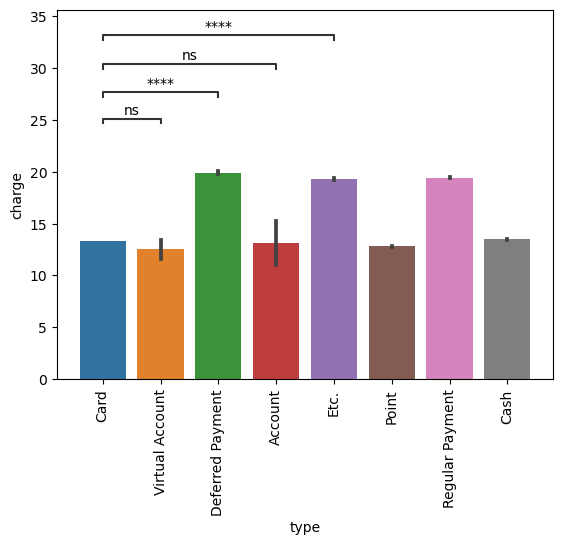

In [141]:
ax = plt.subplot()
ax = sns.barplot(data=df, x='결제방법_정리', y='판매금액_로그')
plt.xlabel('type')
plt.ylabel('charge')
plt.xticks(rotation=90)

add_stat_annotation(ax, 
                    data=df, 
                    x = '결제방법_정리', 
                    y = '판매금액_로그',
                    box_pairs=[(('Card'), ('Virtual Account')),
                              (('Card'), ('Deferred Payment')),
                              (('Card'), ('Account')),
                              (('Card'), ('Etc.'))],
                    test='t-test_ind', 
                    text_format='star', 
                    loc='inside', 
                    verbose=2)

In [143]:
gini = df[df['업체명'] == '지니']['판매금액']
ace = df[df['업체명'] == '에이스디포']['판매금액']

In [149]:
gini = list(gini[:100])

In [150]:
ace = list(ace[:100])

In [153]:
stats.spearmanr(gini, ace)

SpearmanrResult(correlation=-0.06588898718556489, pvalue=0.5148436221975197)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

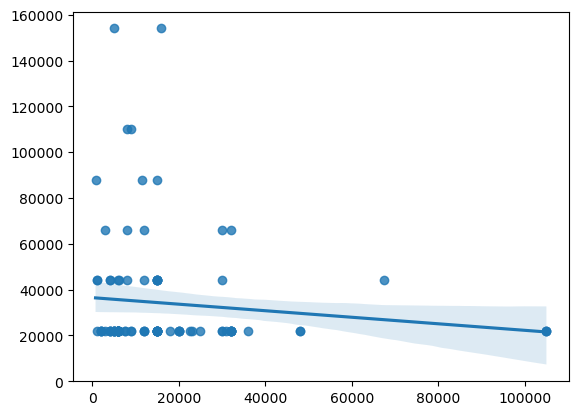

In [154]:
sns.regplot(gini, ace)

In [179]:
list1 = list(range(100))
list2 = list(range(200,0,-2))

In [181]:
stats.spearmanr(list1, list2)

SpearmanrResult(correlation=-0.9999999999999999, pvalue=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

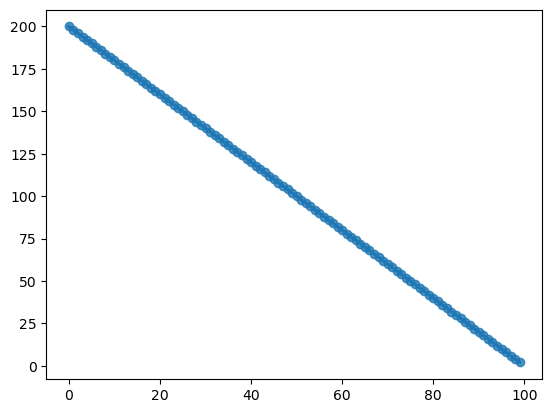

In [182]:
sns.regplot(list1, list2)